<a href="https://colab.research.google.com/github/Aleksandra191/PUM_projekt_NA_EM_AK/blob/main/hiperparametryzacja.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regresja

In [29]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from xgboost import XGBRegressor
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

In [30]:
cleaned_data = pd.read_excel('clean_data_relevant.xlsx')

In [31]:
cleaned_data = cleaned_data[['BROKER', 'LATITUDE', 'LONGITUDE', 'TYPE', 'BOROUGH','NEIGHBOURHOOD', 'BEDS', 'POSTCODE', 'BATH', 'PROPERTYSQFT', 'PRICE']]

In [32]:
from sklearn.model_selection import train_test_split

X = cleaned_data.drop(columns='PRICE')
y = cleaned_data['PRICE']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
trained_models = []

## Modele

In [34]:
linear = LinearRegression()

param_grid = {
    'fit_intercept': [True, False],
    'copy_X': [True, False],
    'n_jobs': [3, 4, 10,15,20,50,80],
    'positive': [True, False]
}


grid_search = GridSearchCV(estimator=linear, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error',  verbose=2)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

best_xgb_model = grid_search.best_estimator_
y_pred = best_xgb_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("R-squared: ", r2)

Fitting 5 folds for each of 56 candidates, totalling 280 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=3, positive=True; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=3, positive=True; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=3, positive=True; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=3, positive=True; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=3, positive=True; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=3, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=3, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=3, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=3, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=3, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=4, positive=True; total 

In [35]:
xgb_model = XGBRegressor()

param_grid = {
    'n_estimators': [25, 50, 75]
}

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

best_xgb_model = grid_search.best_estimator_
y_pred = best_xgb_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("R-squared: ", r2)


Best parameters found:  {'n_estimators': 50}
R-squared:  0.6301618111670517


In [36]:

xgb_model = XGBRegressor()

param_grid = {
    'n_estimators': [25, 50, 75],
    'max_depth': [ 3, 5, 10]
}

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

best_xgb_model_2 = grid_search.best_estimator_
y_pred = best_xgb_model_2.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("R-squared: ", r2)

Best parameters found:  {'max_depth': 3, 'n_estimators': 25}
R-squared:  0.6634425443734272


In [37]:
xgb_model = XGBRegressor()

param_grid = {
    'n_estimators': [25, 50, 75],
    'max_depth': [ 3, 5, 10],
    'learning_rate': [0.05, 0.1, 0.15]
}

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

best_xgb_model_3 = grid_search.best_estimator_
y_pred = best_xgb_model_3.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("R-squared: ", r2)

Best parameters found:  {'learning_rate': 0.15, 'max_depth': 3, 'n_estimators': 50}
R-squared:  0.6532830889068985


In [38]:
xgb_model = XGBRegressor()

param_grid = {
    'n_estimators': [25, 50, 75],
    'max_depth': [ 3, 5, 10],
    'learning_rate': [0.1, 0.15],
    'max_leaves':[25, 50, 200,0]
}


grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

best_xgb_model_4 = grid_search.best_estimator_
y_pred = best_xgb_model_4.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("R-squared: ", r2)


Best parameters found:  {'learning_rate': 0.15, 'max_depth': 3, 'max_leaves': 25, 'n_estimators': 50}
R-squared:  0.6532830889068985


In [39]:
xgb_model = XGBRegressor()

param_grid = {
     'n_estimators': [25, 50, 75],
    'max_depth': [ 3, 5, 10],
    'learning_rate': [0.1, 0.15],
    'max_leaves':[25, 50, 200,0],
    'tree_method': ['exact', 'approx', 'hist']
}


grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

best_xgb_model_5 = grid_search.best_estimator_
y_pred = best_xgb_model_5.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("R-squared: ", r2)


Best parameters found:  {'learning_rate': 0.15, 'max_depth': 3, 'max_leaves': 25, 'n_estimators': 75, 'tree_method': 'exact'}
R-squared:  0.6414683850465416


In [40]:
xgb_model = XGBRegressor()

param_grid = {
    'n_estimators': [25, 50, 75],
    'max_depth': [ 5,8, 10],
    'learning_rate': [0.05, 0.1, 0.15],
    'max_leaves':[25, 50,200,0],
    'tree_method': ['exact', 'approx', 'hist'],
    'gamma': [0, 0.1, 0.2]
}

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

best_xgb_model_6 = grid_search.best_estimator_
y_pred = best_xgb_model_6.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("R-squared: ", r2)


Best parameters found:  {'gamma': 0, 'learning_rate': 0.1, 'max_depth': 5, 'max_leaves': 25, 'n_estimators': 75, 'tree_method': 'exact'}
R-squared:  0.6741242999093524


In [41]:
xgb_model = XGBRegressor()

param_grid = {
    'n_estimators': [25, 50, 75],
    'max_depth': [ 5,8, 10],
    'learning_rate': [0.05, 0.1, 0.15],
    'max_leaves':[25, 50,200,0],
    'tree_method': ['exact', 'approx', 'hist'],
    'gamma': [0.1, 0.2]
}

grid_search = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_grid, cv=5, scoring='neg_mean_squared_error', n_iter=200)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

best_xgb_model_7 = grid_search.best_estimator_
y_pred = best_xgb_model_7.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("R-squared: ", r2)


Best parameters found:  {'tree_method': 'exact', 'n_estimators': 75, 'max_leaves': 25, 'max_depth': 5, 'learning_rate': 0.1, 'gamma': 0.2}
R-squared:  0.6741242999093524


In [42]:
xgb_model = XGBRegressor()

param_grid = {
    'n_estimators': [100, 500, 750],
    'max_depth': [ 5, 7],
    'learning_rate': [0.05, 0.1],
    'max_leaves':[0, 10],
    'tree_method': [ 'approx', 'exact']
}

grid_search = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_grid, cv=5, scoring='neg_mean_squared_error', n_iter=200)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

best_xgb_model_8 = grid_search.best_estimator_
y_pred = best_xgb_model_8.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("R-squared: ", r2)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 48 is smaller than n_iter=200. Running 48 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters found:  {'tree_method': 'exact', 'n_estimators': 500, 'max_leaves': 0, 'max_depth': 5, 'learning_rate': 0.05}
R-squared:  0.6813970124277131


In [43]:
rf_model = RandomForestRegressor()

param_grid = {
    'n_estimators': [20,50, 70],
    'max_depth': [None, 10, 20, 30],
    'criterion':['squared_error', 'absolute_error', 'friedman_mse', 'poisson']
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

best_rf_model = grid_search.best_estimator_
y_pred = best_rf_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("R-squared: ", r2)

Best parameters found:  {'criterion': 'poisson', 'max_depth': 20, 'n_estimators': 50}
R-squared:  0.6630910611411529


In [44]:

rf_model = RandomForestRegressor()

param_grid = {
    'n_estimators': [20,50, 70],
    'max_features': ['auto', 'sqrt', 'log2', None],
    'bootstrap':[True , False]
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

best_rf_model_2 = grid_search.best_estimator_
y_pred = best_rf_model_2.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("R-squared: ", r2)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

Best parameters found:  {'bootstrap': True, 'max_features': 'sqrt', 'n_estimators': 70}
R-squared:  0.6682914367280991


In [45]:
rf_model = RandomForestRegressor()

param_grid = {
    'n_estimators': [20, 50],
    'max_depth': [None,5, 10],
    'criterion':['squared_error', 'friedman_mse', 'poisson'],
    'max_features': ['auto', 'sqrt', 'log2', None],
    'bootstrap':[True , False]
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

best_rf_model_3 = grid_search.best_estimator_
y_pred = best_rf_model_3.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("R-squared: ", r2)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

Best parameters found:  {'bootstrap': True, 'criterion': 'poisson', 'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 50}
R-squared:  0.6675360383586544


Po hiperparametryzacji najlepszeym modelem okazał się XGBRegressor o następujących hiperparametrach:

- 'tree_method': 'hist',
- 'n_estimators': 50,
- 'max_leaves': 50,
- 'max_depth': 5,
- 'learning_rate': 0.15,
- 'gamma': 0.1

RY2 jest równe dla tego modelu 0.69, co wskazuje na umiarkowanie silny model regresji. Oznacza to, że 69% zmienności cen jest wyjaśniana przez zmienne niezależne  użyte w szkoleniu  modelu regresji.



Ważność cech

In [46]:
import lime
import shap

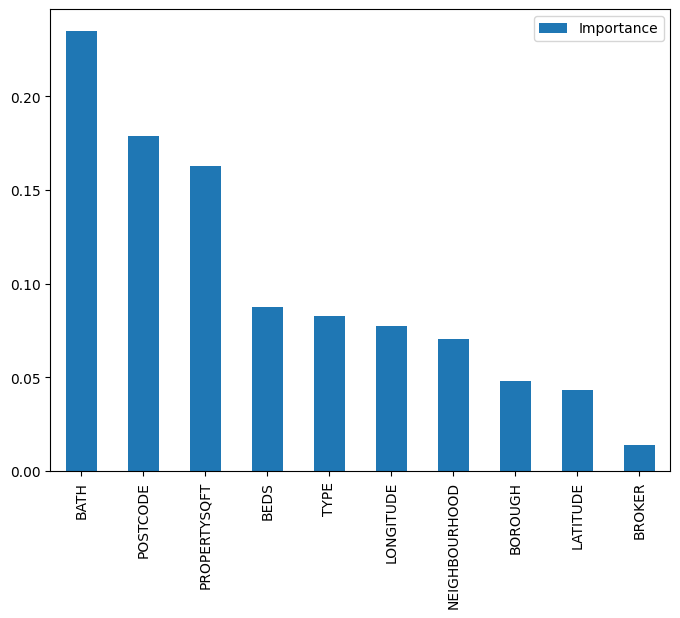

In [47]:
feat_importances = pd.DataFrame(best_xgb_model_7.feature_importances_, index=X_train.columns, columns=["Importance"])
feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
feat_importances.plot(kind='bar', figsize=(8,6))
shap.initjs()

Na podstawie powyższego wykresu można stwierdzić, że czynniki takie jak liczba łazienek, lokalizacja i wielkość nieruchomości mają kluczowe znaczenie dla określania cen mieszkań.
Cechy o niższych wynikach ważności nadal wnoszą wkład do modelu, ale mają mniejszy wpływ na ostateczną prognozę.

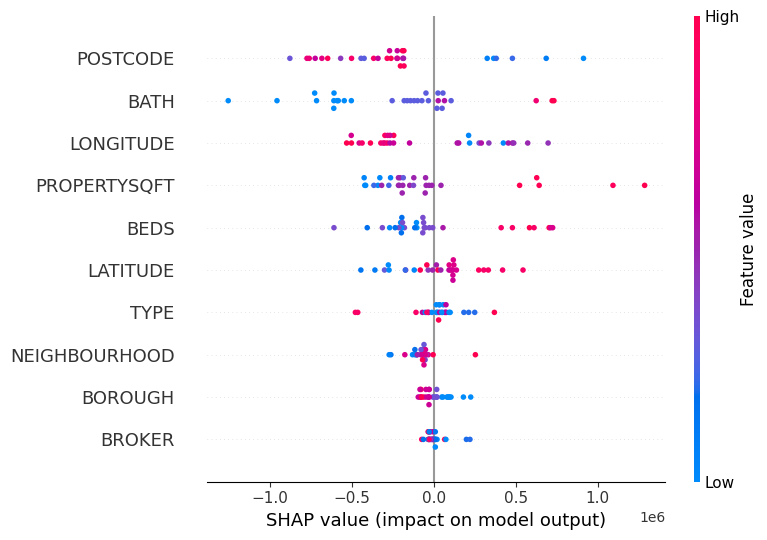

In [48]:
explainer = shap.Explainer(best_xgb_model_7,  feature_names = X_train.columns)
shap_values = explainer.shap_values(X_test)
shap_values = explainer.shap_values(X_test[:30])
shap.summary_plot(shap_values, X_test[:30])

Rozrzut wartości SHAP dla każdej cechy pokazuje zakres jej wpływu na prognozy.

- POSTCODE: Wysokie wartości SHAP dla określonych kodów pocztowych sugerują, że lokalizacja może znacząco zwiększyć lub zmniejszyć przewidywaną cenę mieszkania. Podobne wnioski można wyciągnąć dla zmiennych LONGITUDE i LATITUDE.
- BATH, BEDS: Liczba łazienek (sypialni) również ma znaczący wpływ, przy czym większa liczba łazienek (sypialni) generalnie zwiększa przewidywaną cenę.
- PROPERTYSQFT: Większe rozmiary nieruchomości generalnie prowadzą do wyższych cen.
- TYPE, BOROUGH, NEIGHBOURHOOD, BROKER: Cechy te mają mniejszy, ale nadal zauważalny wpływ na ceny mieszkań.


Intercept 3499325.1080469214
Prediction_local [374777.08142794]
Right: 262017.66


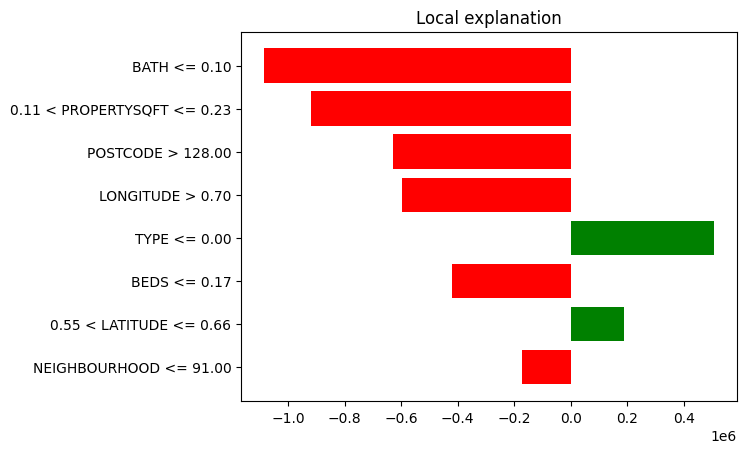

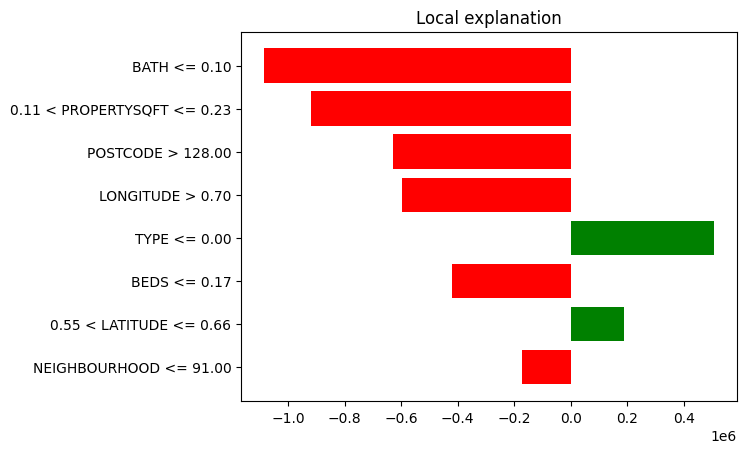

In [49]:
explainer2 = lime.lime_tabular.LimeTabularExplainer(X_train.values, feature_names=X_train.columns.values.tolist(), class_names=['PRICE'], verbose=True, mode='regression')

instance = X_train.iloc[4].values.reshape(1, -1)
explanation2 = explainer2.explain_instance(X_test.values[1000], best_xgb_model_7.predict, num_features=8)
explanation2.as_pyplot_figure()

- BEDS <= 0.17: Ta cecha ma największy negatywny wpływ na przewidywania. Sugeruje, że posiadanie mniejszej liczby sypialni obniża przewidywaną cenę.
- PROPERTYSQFT <= 0.11: Wielkość nieruchomości ma również znaczący negatywny wpływ, gdy jest poniżej określonego progu.
- POSTCODE > 128.00: Kod pocztowy ma negatywny wpływ, sugerując, że nieruchomości w tym obszarze kodu pocztowego mają zwykle niższe przewidywane ceny.
- LONGITUDE > 0,70: Wartość długości geograficznej ma zauważalny negatywny wpływ na prognozę, wskazując, że określony obszar geograficzny ma negatywny wpływ na cenę.
- 2.00 < TYPE <= 9.00: Ten zakres typów nieruchomości również obniża przewidywaną cenę.
- LATITUDE <= 0.34: Niższe wartości szerokości geograficznej mają negatywny wpływ na prognozę.
- BATH <= 0.10: Mniejsza liczba łazienek obniża przewidywaną cenę.
- 1.00 < BOROUGH <= 2.00: Ten zakres gmin nieznacznie obniża przewidywaną cenę.

Variable Importance Plot - Global Interpretation


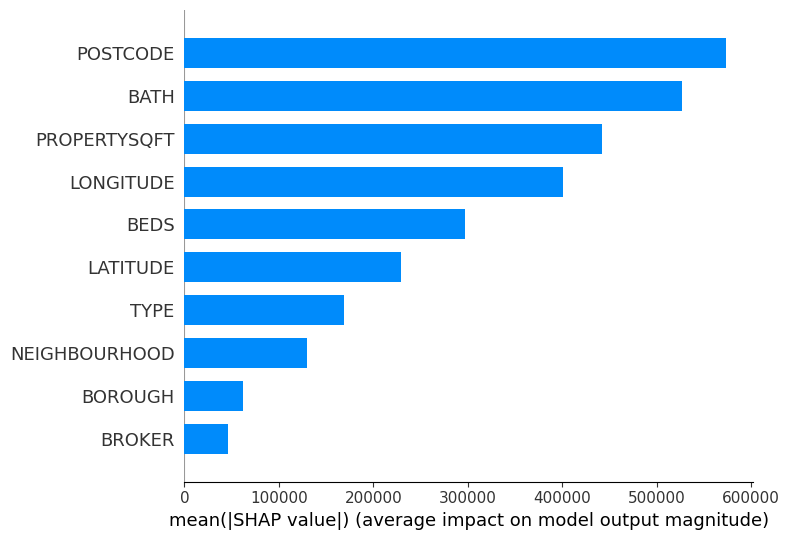

In [50]:
shap_values = explainer.shap_values(X_test)
print("Variable Importance Plot - Global Interpretation")

shap.summary_plot(shap_values, X_test, plot_type="bar")

- POSTCODE: Ta cecha ma największy średni wpływ, wskazując, że lokalizacja (kod pocztowy) jest najbardziej wpływowym czynnikiem w przewidywaniu cen mieszkań.
- BATH: Liczba łazienek jest drugą najważniejszą cechą.
- LONGITUDE: Długość geograficzna ma znaczący wpływ, odzwierciedlając znaczenie lokalizacji.
- PROPERTYSQFT: Wielkość nieruchomości w stopach kwadratowych również odgrywa kluczową rolę.
- BEDS: Liczba sypialni ma znaczący średni wpływ.
- LATITUDE: Kolejną ważną cechą jest szerokość geograficzna.
- TYPE: Typ nieruchomości ma wpływ na prognozy, ale w mniejszym stopniu.
- NEIGHBOURHOOD, BOROUGH, BROKER i Unnamed: 0: Te cechy mają stosunkowo niższy średni wpływ w porównaniu do innych.

Ze względu na umiarkowanie dobrą jakość wytrenowanych modeli regresyjnych, zdecydowałyśmy się nie skupiać na klasyfikacji.